## Import Libraries

In [1]:
#import libraries

import pandas as pd
import seaborn as sns

## Download dataset from Kaggle

In [2]:
# set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'fouziasahmed'
os.environ['KAGGLE_KEY'] = 'c529bdc43959787fc052aa85ddd6fb49'

In [8]:
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
# unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


## Load & Explore Data

In [15]:
# load data to dataframe
df = pd.read_csv('/content/data.csv')

In [18]:
# display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
# count of rows & columns
df.shape

(569, 33)

In [22]:
# count null values
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [25]:
# drop the column with null vales (here unnamed col has 569 null values i.e no data in column)

df.dropna(axis=1, inplace=True)
# axis =1 :  columns with missing values should be dropped. axis = 0 (drops rows with missing values)
# inplace = True : ensure the changes are made to the dataset directly instead of needing a new dataset
# inplace = False (the default), the function would return a new DataFrame with the columns dropped, leaving the original DataFrame unchanged

In [26]:
# count of rows & columns again
df.shape

(569, 32)

In [28]:
# get count of number of M (malignant) or B (benign) cells in diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


## Label Encoding

In [34]:
# get datatypes of each column
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [37]:
# encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# converting diagnosis column (categorical) to numeric form
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1].values) # : all rows, index 1 column

# df.iloc[:,1].values # picks the values of the list part of the array that is the output of iloc

In [38]:
# display df
df
# dignosis is converted to 1s and 0s [1: malignant, 0: benign]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Split the data into independent and dependent variables (sets) and perform feature scaling

In [41]:
# diagnosis : dependent / output var(as it depends on the tumor parameters i.e. other features)
# other features: independent (from each other)

X = df.iloc[:,2:].values #entire rows for all columns after diganosis column - independent set (attributes of tumor)
Y = df.iloc[:,1].values # just the diagnosis column - dependent set (outcome if tumor is m or b)

In [43]:
# Splitting datasets into training (75%) and test (25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25)

In [56]:
# scaling the data (Feature scaling)
from sklearn.preprocessing import StandardScaler

# 1. standardize features to scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#Y_train = sc.fit_transform(Y_train)
#Y_test = sc.fit_transform(Y_test)

In [57]:
# print training data
X_train

array([[-0.58917131, -0.06000102, -0.6350145 , ..., -0.96430813,
        -0.05950009, -0.17612018],
       [ 0.28586422, -0.91168048,  0.26137261, ...,  0.37688195,
         0.06176976, -0.02493761],
       [ 3.03895219,  0.26660173,  3.22561571, ...,  1.71699254,
         0.50096326, -0.21621879],
       ...,
       [-0.70822376, -0.51975719, -0.76263864, ..., -1.0924591 ,
        -0.30367856, -0.85779645],
       [-1.37938196,  0.64345104, -1.37057795, ..., -1.16833187,
        -0.07261034, -0.05636624],
       [ 0.27098267, -0.09266129,  0.27818795, ..., -0.45355482,
        -0.10538597,  0.43890571]])

## Build Logistic Regression Model

In [66]:
import numpy as np
Y_train = Y_train.astype(np.int64)
# converted Y_train var to int64 format as ML algorithms expect the target variables to be represented as integers

In [75]:
Y_test = Y_test.astype(np.int64)

In [76]:
Y_test

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [67]:
# build a logistic classifier
# Binary classification problem

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# fit model to training data
classifier.fit(X_train,Y_train)

LogisticRegression()

In [68]:
# make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

In [69]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Performance Evaluation

[[90  0]
 [ 2 51]]


<Axes: >

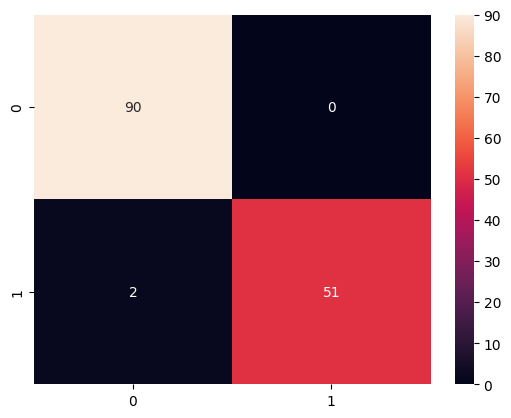

In [77]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
print(cm)
sns.heatmap(cm, annot=True)


# Confusion Matrix Reference:
# [TP FP]
# [FN TN]

In [78]:
# Calculate accuracy score of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.986013986013986